In [25]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [31]:
import warnings
warnings.filterwarnings('ignore')

# Стабильность сигнатур, возмущенных одним соединением.

In [28]:
df_intersecting_signatures_by_pert_id = pd.read_csv('intersecting_signatures_by_pert_id.csv', index_col = 1)

In [29]:
df_intersecting_signatures_by_pert_id.head()

,Unnamed: 0,pert_name,sig_id_1,sig_id_2,cell_id for sig_1,cell_id for sig_2,canonical_smiles,Up intersecting genes,List of up intersecting genes,Tc up,Down intersecting genes,List of down intersecting genes,Tc down
pert_id,,,,,,,,,,,,,
BRD-A00520476,0,otenzepad,CPC011_HA1E_6H:BRD-A00520476-001-05-8:10,CPC011_HT29_6H:BRD-A00520476-001-05-8:10,HA1E,HT29,CCN(CC)CC1CCCCN1CC(=O)N2c3ccccc3C(=O)Nc4cccnc24,16,NR4A2;SLC7A11;CADM1;TMEM45A;S100A8;TIMM8B;FCGB...,0.039409,22,DLK1;TGFBR3;GPR183;MPPED2;CCDC86;IGF2BP3;COL15...,0.047210
BRD-A00546892,1,biperiden,CPC015_A375_6H:BRD-A00546892-001-01-8:10,CPC015_ASC_24H:BRD-A00546892-001-01-8:10,A375,ASC,OC(CCN1CCCCC1)(C2CC3CC2C=C3)c4ccccc4,17,CHST15;RRAD;PDZK1;CRYAB;CP;FBXO2;PLCB1;KRT15;S...,0.041363,15,CTSH;NRN1;HLA-DQB1;KLF9;GNAS;DACT1;MGP;SLC2A3;...,0.034884
BRD-A00546892,2,biperiden,CPC015_A375_6H:BRD-A00546892-001-01-8:10,CPC015_NPC_24H:BRD-A00546892-001-01-8:10,A375,NPC,OC(CCN1CCCCC1)(C2CC3CC2C=C3)c4ccccc4,16,SNRPB;CLU;TKTL1;BASP1;AADAC;TFPI2;PRKAR2B;C10O...,0.039312,11,THBS2;CLIC4;IFITM1;HPGD;SLC1A1;FAM129A;ATXN7L3...,0.023810
BRD-A00546892,3,biperiden,CPC015_ASC_24H:BRD-A00546892-001-01-8:10,CPC015_NPC_24H:BRD-A00546892-001-01-8:10,ASC,NPC,OC(CCN1CCCCC1)(C2CC3CC2C=C3)c4ccccc4,20,MYBPC1;CHMP4A;SERPINA1;PHLDA1;PPAP2C;FBXO21;SO...,0.043197,12,MYO6;LSM5;IDS;SERPINB1;GPNMB;TUBB2B;POLR1D;LOX...,0.029703
BRD-A00758722,4,noretynodrel,CPC002_VCAP_24H:BRD-A00758722-001-03-1:10,CPC002_VCAP_6H:BRD-A00758722-001-03-1:10,VCAP,VCAP,C[C@@]12CCC3C(CCC4=C3CCC(=O)C4)C2CC[C@@]1(O)C#C,40,SERPINA3;SERF2;SLC25A13;CYTH1;RGS1;UCP2;SCGB2A...,0.094787,40,FABP5;ST6GALNAC5;CLU;SMARCD3;STC2;MGP;TP53;IGF...,0.096852


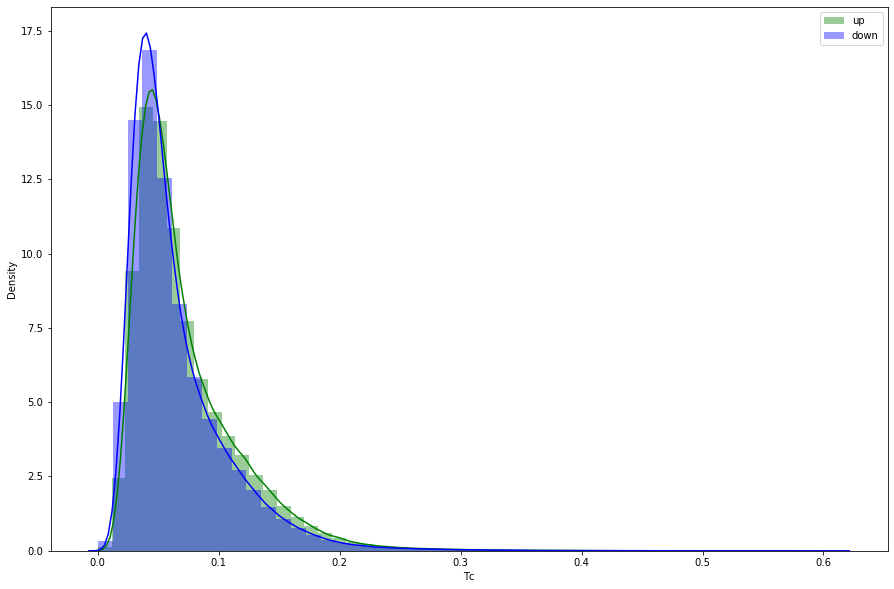

In [32]:
plt.figure(figsize=(15, 10))
snsplot = sns.distplot(df_intersecting_signatures_by_pert_id['Tc up'], color = 'green', label = 'up')
snsplot = sns.distplot(df_intersecting_signatures_by_pert_id['Tc down'], color = 'b', label = 'down')
snsplot.legend()
snsplot.set_xlabel('Tc')
plt.show()
fig = snsplot.get_figure()

# Стабильность сигнатур, возмущенных одним соединением на одной клеточной линии.

Так как изначально смотрелось пересечение сигнатур, соответствующих одной клеточной линии, то необходимо отобрать пары сигнатур, соответствующие одному соединению.(поскольку файл очень большой, то сначала работаю с ним построчно, а после отбора нужных сигнатур, начну использовать датафреймы)

In [6]:
with open('intersecting_signatures_by_cell_id_1.csv',"r") as file:
    string = file.readline()
    while string:
        list_sting_splited = string.split(',')
        if list_sting_splited[4] == list_sting_splited[5]:
            with open('intersecting_signatures_by_cell_id_same_pert_id.csv',"a") as file_1:
                file_1.write(string)
        string = file.readline()      

In [15]:
with open('intersecting_signatures_by_cell_id.csv',"r") as file:
    list_head = file.readline()

In [17]:
list_col = list_head.split('\n')[0].split(',')[1:]

In [33]:
df_intersecting_signatures_by_cell_id_same_pert_id = pd.read_csv('intersecting_signatures_by_cell_id_same_pert_id.csv', index_col = 0, names = list_col)

In [34]:
df_intersecting_signatures_by_cell_id_same_pert_id = df_intersecting_signatures_by_cell_id_same_pert_id.sort_values(by = 'cell_id')

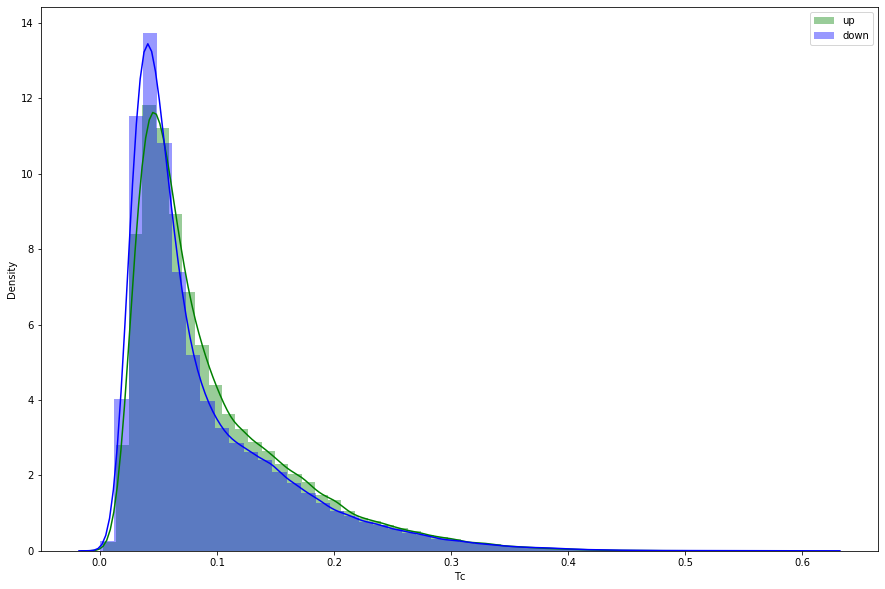

In [35]:
df_intersecting_signatures_by_cell_id_same_pert_id['Tc up']
plt.figure(figsize=(15, 10))
snsplot = sns.distplot(df_intersecting_signatures_by_cell_id_same_pert_id['Tc up'], color = 'green', label = 'up')
snsplot = sns.distplot(df_intersecting_signatures_by_cell_id_same_pert_id['Tc down'], color = 'b', label = 'down')
snsplot.legend()
snsplot.set_xlabel('Tc')
plt.show()
fig = snsplot.get_figure()